In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/var/folders/p2/6ddwj2812811pbqjm8t6brv80000gn/T/ipykernel_68575/1645014047.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df = pd.read_excel('Data/Time Series Data.xlsx')
df.head(5)

<IPython.core.display.Javascript object>

,Day,Series 1,Series 2,Series 3,Series 4,Series 5,Series 6,Series 7,Series 8,Series 9,...,Series 20,Series 21,Series 22,Series 23,Series 24,Series 25,Series 26,Series 27,Series 28,Series 29
0,0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1,100.172920,100.589993,103.823464,98.644063,99.750482,106.614321,101.767999,100.732626,99.952576,...,101.568951,99.730607,99.673906,99.409461,99.113705,100.012563,100.311565,99.887188,96.556886,97.922078
2,2,98.579911,98.767737,107.058757,97.936942,99.220660,110.602917,100.681776,100.383846,99.617067,...,106.193229,101.541426,99.977798,99.577298,99.783831,99.682467,100.366287,99.902872,95.608782,100.000000
3,3,98.397809,97.087379,107.352843,100.000000,99.251805,113.424191,102.651998,101.569981,98.659381,...,106.936416,100.938414,99.278429,99.055138,100.875486,99.637414,100.767880,100.216365,95.109780,100.000000
4,4,99.051233,99.716206,105.587978,99.703996,99.407530,113.715275,100.710685,101.081407,99.760755,...,107.018993,101.448655,99.979185,99.602163,100.162127,100.379047,101.058262,100.323414,90.469062,99.480519


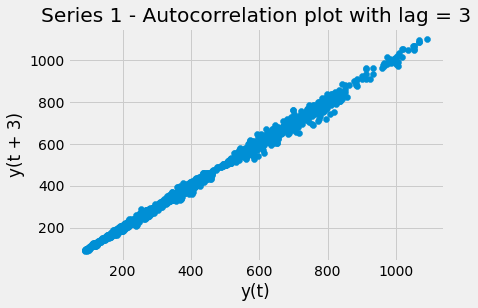

In [3]:
plt.figure()
lag_plot(df['Series 1'], lag=3)
plt.title('Series 1 - Autocorrelation plot with lag = 3')
plt.show()

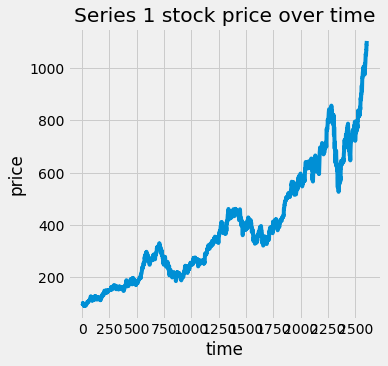

In [4]:
def plot_series(Series):
    plt.figure(figsize=(5,5))
    plt.plot(df["Day"], df[Series])
    plt.xticks(np.arange(0,2607, 250))
    plt.title("{} stock price over time".format(Series))
    plt.xlabel("time")
    plt.ylabel("price")
    plt.show()
plot_series('Series 1')

In [5]:
def model_training_plot(series):
    
    train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
    training_data = train_data[series].values
    test_data = test_data[series].values
    history = [x for x in training_data]
    model_predictions = []
    N_test_observations = len(test_data)

    for time_point in range(N_test_observations):
        model = ARIMA(history, order=(4,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        model_predictions.append(yhat)
        true_test_value = test_data[time_point]
        history.append(true_test_value)
    MSE_error = mean_squared_error(test_data, model_predictions)
    print('Testing Mean Squared Error for {} is {}'.format(series, MSE_error))
    
    return model_predictions, test_data

In [8]:
for i in range(1,29):
    series = 'Series ' + str(i)
    model_training_plot(series)

Testing Mean Squared Error for Series 1 is 108.99500683293638
Testing Mean Squared Error for Series 2 is 391.92591532626585
Testing Mean Squared Error for Series 3 is 8.017790461826458
Testing Mean Squared Error for Series 4 is 53.167386454638645
Testing Mean Squared Error for Series 5 is 25.530085220523773
Testing Mean Squared Error for Series 6 is 4.073579101835957
Testing Mean Squared Error for Series 7 is 4.172567908887421
Testing Mean Squared Error for Series 8 is 84.59559253639716
Testing Mean Squared Error for Series 9 is 25.566629204289157
Testing Mean Squared Error for Series 10 is 4.174874811831825
Testing Mean Squared Error for Series 11 is 3.6785690041838923
Testing Mean Squared Error for Series 12 is 31.595372432364265
Testing Mean Squared Error for Series 13 is 7911.871767850545
Testing Mean Squared Error for Series 14 is 840.4020624217897
Testing Mean Squared Error for Series 15 is 9.252308589069692
Testing Mean Squared Error for Series 16 is 4.181141331605835
Testing Me

/Users/monmac/.pyenv/versions/3.8.6/envs/mev-project/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/monmac/.pyenv/versions/3.8.6/envs/mev-project/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Testing Mean Squared Error for Series 22 is 0.10745225152572163
Testing Mean Squared Error for Series 23 is 0.17854331277499258
Testing Mean Squared Error for Series 24 is 0.2651294522745721
Testing Mean Squared Error for Series 25 is 9.849505426113913
Testing Mean Squared Error for Series 26 is 3.6179804426569886
Testing Mean Squared Error for Series 27 is 3.6547118113605825
Testing Mean Squared Error for Series 28 is 56.50926634961002


Testing Mean Squared Error for Series 2 is 391.92591532626585


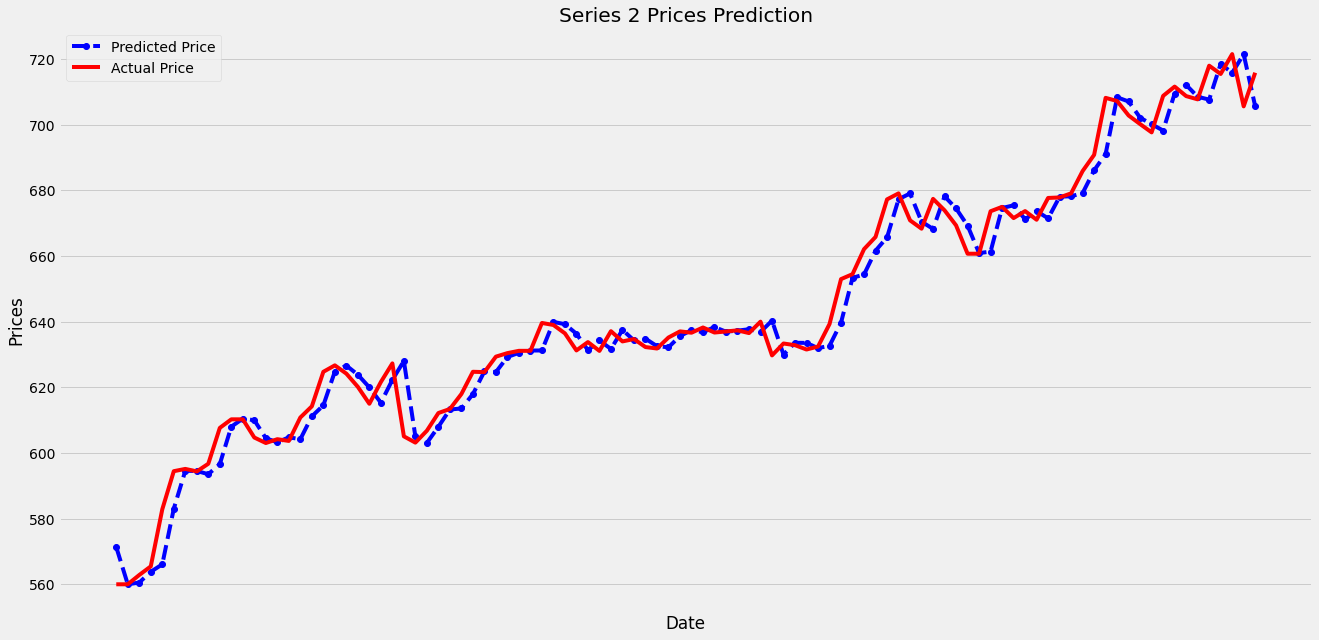

In [8]:
def plot_predictions(series, points_shown=100):
    
    model_predictions, test_data = model_training_plot(series)
    
    plt.figure(figsize=(20,10))
    test_set_range = df[int(len(df)*0.7):].index

    starting_point = 1750
    
    plt.plot(test_set_range[:points_shown], model_predictions[:points_shown], color='blue', marker='o', linestyle='dashed',label='Predicted Price')
    plt.plot(test_set_range[:points_shown], test_data[:points_shown], color='red', label='Actual Price')

    plt.title('{} Prices Prediction'.format(series))
    plt.xlabel('Date')
    plt.ylabel('Prices')

    plt.xticks(np.arange(starting_point,starting_point+points_shown, 250))
    plt.legend()
    plt.show()
    
plot_predictions('Series 2')

In [9]:
import math
math.sqrt(391.9259)

19.797118477192583

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(test_data[:points_shown], label=, alpha=0.4)
plt.plot(df[series], label='SMA', alpha=0.4)

plt.title('Stock Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Days')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()

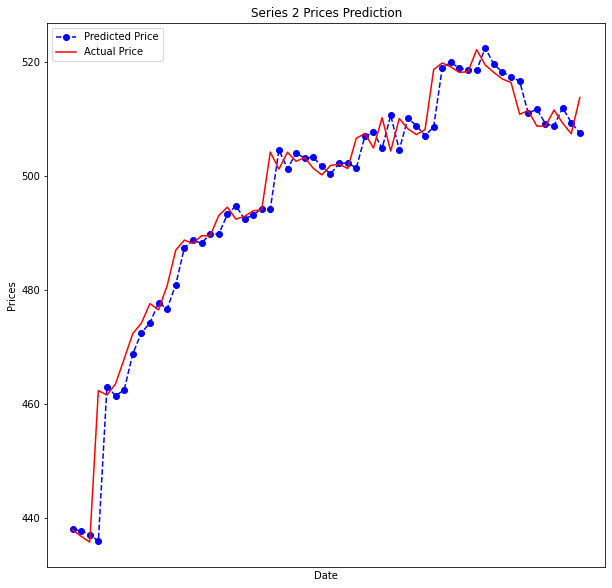

In [ ]:
plt.figure(figsize=(10,10))
test_set_range = df[int(len(df)*0.7):].index
series = 'Series 2'
starting_point = 1950

start = 20
end = 50
d = 30

plt.plot(test_set_range[start:end+d], model_predictions[start:end+d], color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range[start:end+d], test_data[start:end+d], color='red', label='Actual Price')

plt.title('{} Prices Prediction'.format(series))
plt.xlabel('Date')
plt.ylabel('Prices')

plt.xticks(np.arange(starting_point,starting_point+points_shown, 250))
plt.legend()
plt.show()